In [1]:
from FeatureExtractor import get_data
from plotutils import model_history,c_report,plot_confusion_matrix
import numpy as np
from tensorflow import keras
import sklearn
from keras.models import  Model
from keras.layers import *
from keras.regularizers import *
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from keras.callbacks import *
import numpy as np
import pandas as pd

In [2]:
# read data and call get_data function to get splits of data
emodb_data = pd.read_csv('Downloads/Emodb_dataset.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
z=label.fit_transform(emodb_data['labels'])
z

array([4, 5, 1, 4, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 0, 4, 5, 6, 1, 1, 4, 4,
       2, 5, 1, 4, 2, 5, 6, 1, 1, 0, 2, 5, 6, 1, 5, 6, 1, 2, 5, 6, 1, 0,
       3, 5, 5, 1, 1, 0, 4, 2, 5, 1, 1, 0, 0, 4, 2, 5, 6, 1, 4, 2, 5, 6,
       1, 4, 2, 5, 6, 1, 4, 2, 5, 6, 6, 1, 0, 4, 4, 2, 5, 1, 4, 2, 5, 6,
       1, 4, 2, 5, 6, 1, 0, 4, 2, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 3, 4, 5,
       1, 3, 3, 2, 1, 4, 2, 5, 1, 3, 2, 5, 6, 1, 1, 3, 5, 6, 1, 1, 3, 5,
       1, 5, 6, 1, 1, 3, 4, 4, 2, 5, 6, 1, 3, 5, 1, 0, 5, 1, 0, 5, 1, 0,
       4, 2, 5, 1, 4, 5, 1, 1, 0, 2, 6, 1, 0, 0, 2, 6, 1, 0, 3, 4, 2, 0,
       2, 5, 1, 2, 6, 1, 0, 2, 1, 4, 2, 1, 0, 0, 2, 5, 1, 3, 4, 2, 5, 6,
       1, 0, 4, 5, 1, 0, 4, 4, 2, 5, 6, 1, 0, 2, 6, 1, 0, 3, 4, 2, 5, 1,
       0, 4, 5, 6, 1, 4, 2, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 0, 0, 2, 5, 6,
       1, 4, 2, 5, 1, 0, 3, 5, 1, 1, 1, 0, 2, 5, 6, 1, 0, 2, 1, 6, 1, 0,
       3, 4, 5, 1, 1, 1, 2, 6, 0, 6, 1, 0, 2, 1, 0, 3, 3, 4, 2, 5, 1, 0,
       3, 4, 2, 5, 6, 1, 0, 4, 2, 6, 1, 0, 3, 2, 5,

In [4]:
emodb_data['labels']=z
emodb_data

,uuid,speaker,sentence,letter,labels,suffix,path,paths
0,03a01Fa,3,a01,F,4,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
1,03a01Nc,3,a01,N,5,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
2,03a01Wa,3,a01,W,1,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
3,03a02Fc,3,a02,F,4,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
4,03a02Nc,3,a02,N,5,c,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
...,...,...,...,...,...,...,...,...
530,16b10Lb,16,b10,L,2,b,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
531,16b10Tb,16,b10,T,6,b,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
532,16b10Td,16,b10,T,6,d,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...
533,16b10Wa,16,b10,W,1,a,C:\Users\kiran\Desktop\MiniProject\archive (6)...,C:\Users\kiran\Desktop\MiniProject\archive (6)...


In [5]:
# for 4 classes do some changes in feature extarctor file
X_train, Y_train, X_test, Y_test = get_data()

In [6]:
Y_train = keras.utils.to_categorical(Y_train,7)
Y_test = keras.utils.to_categorical(Y_test,7)

In [7]:
Y=np.array(emodb_data.labels)
from sklearn.utils.class_weight import compute_class_weight
weight = compute_class_weight(class_weight='balanced', classes=np.unique(Y), y=Y)
weight = {i : weight[i] for i in range(7)}

In [8]:
X_train.shape

(290, 128, 274)

In [9]:
input1 = Input(shape=(X_train.shape[1], X_train.shape[2]))
lstm1 = Bidirectional(LSTM(512, return_sequences = True,))(input1)
lstm2 = Bidirectional(LSTM(256, return_sequences = True,))(lstm1)
flat1 = Flatten()(lstm2)

In [10]:
den1 = Dense(64, activation='relu',kernel_regularizer=l2(0.002))(flat1)
den2 = Dense(7, activation='softmax')(den1)

In [11]:
model= Model(inputs=input1,outputs=den2)

# Early stopping callback tracking val_loss
stop_early = EarlyStopping(monitor='val_loss', mode='min',
                           verbose=1, patience=15)

In [12]:
# Model Checkpoint callback tracking val_accuracy
checkpoint = ModelCheckpoint(
    'model1.h5', 
    monitor = 'val_accuracy', 
    verbose = 1, 
    save_best_only = True
)

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model

In [15]:
history = model.fit(X_train, Y_train, validation_split=0.15, class_weight = weight, batch_size=128,epochs =15,callbacks=[checkpoint,stop_early])

Epoch 1/15
2/2 [==============================] - ETA: 0s - loss: 0.8947 - accuracy: 0.7520 
Epoch 1: val_accuracy improved from 0.75000 to 0.77273, saving model to model1.h5
2/2 [==============================] - 28s 16s/step - loss: 0.8947 - accuracy: 0.7520 - val_loss: 0.9062 - val_accuracy: 0.7727
Epoch 2/15
2/2 [==============================] - ETA: 0s - loss: 0.8552 - accuracy: 0.7724 
Epoch 2: val_accuracy improved from 0.77273 to 0.79545, saving model to model1.h5
2/2 [==============================] - 24s 14s/step - loss: 0.8552 - accuracy: 0.7724 - val_loss: 0.8649 - val_accuracy: 0.7955
Epoch 3/15
2/2 [==============================] - ETA: 0s - loss: 0.7963 - accuracy: 0.8455 
Epoch 3: val_accuracy did not improve from 0.79545
2/2 [==============================] - 24s 13s/step - loss: 0.7963 - accuracy: 0.8455 - val_loss: 1.0199 - val_accuracy: 0.7045
Epoch 4/15
2/2 [==============================] - ETA: 0s - loss: 0.7586 - accuracy: 0.8577 
Epoch 4: val_accuracy did not

In [16]:
predict = model.predict(X_test)
loss, accu = model.evaluate(X_test,Y_test,verbose=1)
labels_pred = np.argmax(predict, axis = -1)    
labels_true = np.argmax(Y_test, axis = -1)

2/2 [==============================] - 2s 187ms/step - loss: 0.9959 - accuracy: 0.7879


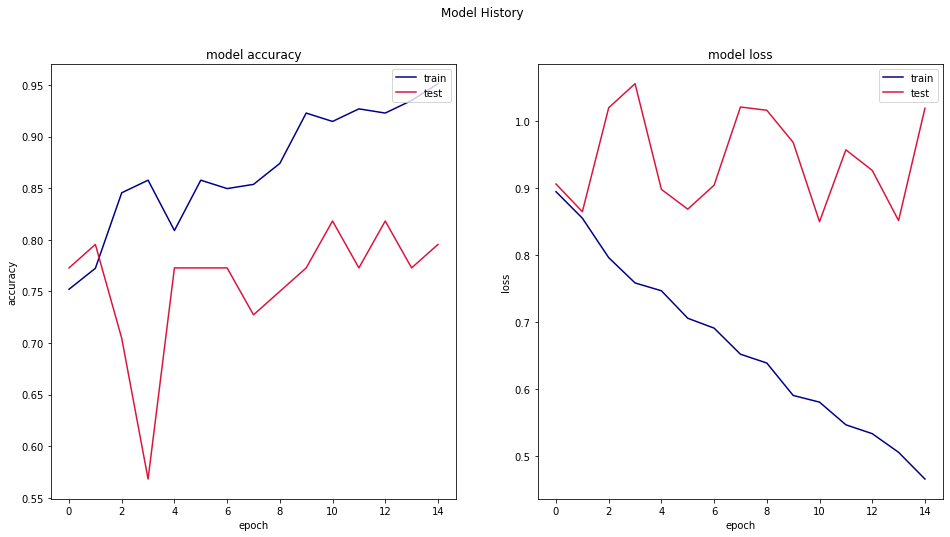

In [17]:
model_history(history)